In [2]:
import pandas as pd
import numpy as np
import pickle
import spacy
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from wordcloud import STOPWORDS
import seaborn as sns
import nltk

In [4]:
data = pd.read_csv("E://Flask//data.csv")

In [5]:
data.head

<bound method NDFrame.head of       Unnamed: 0                                            reviews  senti
0              0  dslr giant canon launched entry level dslr act...      2
1              1                               good camera beginner      2
2              2  great camera perfect product young budding pho...      2
3              3  really impressed amazon surprise delivering wi...      2
4              4  product canon local service center help even p...      2
...          ...                                                ...    ...
2963        2975                                  easy carry handle      2
2964        2976  fine good product canon requires training clas...      2
2965        2977                 camera taking picture good quality      2
2966        2978            good beginerssuper picture quality like      2
2967        2979  like image produced night good lacking camera ...      2

[2968 rows x 3 columns]>

In [6]:
data["senti"].value_counts()

2    2474
1     330
0     164
Name: senti, dtype: int64

In [7]:
data.isnull().sum()

Unnamed: 0     0
reviews       59
senti          0
dtype: int64

In [8]:
data.dropna(inplace = True)

In [9]:
data.isnull().sum()

Unnamed: 0    0
reviews       0
senti         0
dtype: int64

In [12]:
data = data.drop(data.columns[[0]], axis=1)

In [13]:
data.head

<bound method NDFrame.head of                                                 reviews  senti
0     dslr giant canon launched entry level dslr act...      2
1                                  good camera beginner      2
2     great camera perfect product young budding pho...      2
3     really impressed amazon surprise delivering wi...      2
4     product canon local service center help even p...      2
...                                                 ...    ...
2963                                  easy carry handle      2
2964  fine good product canon requires training clas...      2
2965                 camera taking picture good quality      2
2966            good beginerssuper picture quality like      2
2967  like image produced night good lacking camera ...      2

[2909 rows x 2 columns]>

<AxesSubplot:>

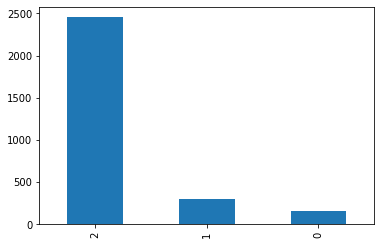

In [18]:
import matplotlib.pyplot as plot
data["senti"].value_counts().plot(kind = "bar")

In [19]:
print(data["senti"].unique())

[2 0 1]


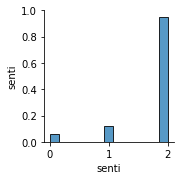

In [20]:
sns.pairplot(data)

In [21]:
import re
def cleaning_text(i):
    i = re.sub("[^A-Za-z" "]+"," ",i).lower()
    i = re.sub("[0-9" "]+"," ",i)
    i= re.sub("[\W+""]", " ",i)        
    w = []
    for word in i.split(" "):
        if len(word)>3:
            w.append(word)
    return (" ".join(w))

In [22]:
data['reviews']=data.reviews.apply(cleaning_text)

In [23]:
data.head(10)

,reviews,senti
0,dslr giant canon launched entry level dslr act...,2
1,good camera beginner,2
2,great camera perfect product young budding pho...,2
3,really impressed amazon surprise delivering wi...,2
4,product canon local service center help even p...,2
5,request replacement camera main body blackspot...,2
6,received product dslr cannon october adopter g...,0
7,auto focus perfectminimum aperture dont expect...,0
8,want upgrade camera point shoot dslr good came...,0
9,really fully content product reached within ev...,0


In [24]:
data.isnull().sum()

reviews    0
senti      0
dtype: int64

In [33]:
X = data["reviews"]
y= data["senti"]

In [37]:
from sklearn.model_selection import train_test_split
split = data[['reviews', 'senti']]
train = split.sample(frac=0.8,random_state = 200)
test = split.drop(train.index)

In [38]:
print(test.shape)
print(train.shape)

(582, 2)
(2327, 2)


In [34]:
import en_core_web_sm
en_model = en_core_web_sm.load()


In [39]:
X_train=train.reviews
y_train=train.senti
X_test=test.reviews
y_test=test.senti

In [35]:
sw_spacy=en_model.Defaults.stop_words

In [42]:
## Extract featires with count vectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
cv = CountVectorizer(min_df=2 , ngram_range=(1,2))
tfidf_transformer = TfidfTransformer()


In [50]:
X = cv.fit_transform(data["reviews"])
print(X.shape)
cv.vocabulary_

(2909, 2694)


{'dslr': 822,
 'canon': 519,
 'launched': 1380,
 'entry': 898,
 'level': 1427,
 'actually': 15,
 'bought': 349,
 'camera': 399,
 'friend': 1080,
 'worth': 2663,
 'easy': 865,
 'decent': 736,
 'battery': 178,
 'backup': 165,
 'live': 1466,
 'mode': 1559,
 'operation': 1681,
 'focusing': 1065,
 'making': 1508,
 'much': 1590,
 'noise': 1652,
 'kind': 1360,
 'annoying': 99,
 'interest': 1341,
 'taking': 2383,
 'photo': 1756,
 'button': 385,
 'change': 597,
 'stop': 2313,
 'aperture': 104,
 'manufacturer': 1517,
 'dedicated': 741,
 'changing': 600,
 'thing': 2409,
 'cant': 553,
 'point': 1828,
 'dial': 770,
 'system': 2368,
 'press': 1854,
 'open': 1674,
 'output': 1703,
 'image': 1300,
 'quality': 1991,
 'mind': 1540,
 'blowing': 339,
 'white': 2603,
 'balance': 168,
 'want': 2569,
 'take': 2369,
 'main': 1501,
 'issue': 1349,
 'flash': 1024,
 'snap': 2256,
 'like': 1444,
 'anything': 103,
 'subject': 2326,
 'whatever': 2601,
 'went': 2600,
 'service': 2201,
 'center': 592,
 'saying': 2173

In [76]:
file = open("transform.pkl","wb")
pickle.dump(cv,file)

In [77]:
## for traning
X_train_counts = cv.fit_transform(train["reviews"].values.astype('U')) 
X_train_tfidf =  tfidf_transformer.fit_transform(X_train_counts) 

In [78]:
## for testing 
X_new_counts = cv.transform(test["reviews"])
X_test_tfidf = tfidf_transformer.transform(X_new_counts)

In [79]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [80]:
import collections
from sklearn.feature_extraction.text import CountVectorizer 
from imblearn.over_sampling import SMOTE

In [81]:
### balancing the data by using smote
sm=SMOTE(random_state=444)
X_train_res, y_train_res = sm.fit_resample(X_train_tfidf, y_train)

In [82]:
##model building by decison tree
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='entropy')
model.fit(X_train_res,y_train_res)

DecisionTreeClassifier(criterion='entropy')

y_score = 

In [83]:
y_pred_score = model.predict(X_test_tfidf)

In [84]:
from sklearn.metrics import cohen_kappa_score
print(accuracy_score(y_test,y_pred_score))
print(classification_report(y_test,y_pred_score))
print(confusion_matrix(y_test,y_pred_score))
print(cohen_kappa_score(y_test,y_pred_score))

0.8848797250859106
              precision    recall  f1-score   support

           0       0.33      0.42      0.37        26
           1       0.65      0.75      0.70        73
           2       0.97      0.93      0.95       483

    accuracy                           0.88       582
   macro avg       0.65      0.70      0.67       582
weighted avg       0.90      0.88      0.89       582

[[ 11  10   5]
 [  7  55  11]
 [ 15  19 449]]
0.6360428975443115


e:\flask\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

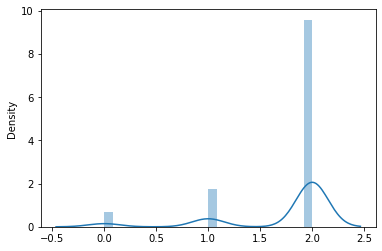

In [85]:
sns.distplot(y_pred_score)

In [87]:
import pickle
# open a file where you want to store the data
file = open("Decision tree model.pkl","wb")

##dump information into that file
pickle.dump(model,file)
